In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [204]:
# Load the Iris dataset
iris = load_iris()

# Features (X) and target (y)
X = iris.data
y = iris.target

# <<Features_Names>> and <<Targets_Names>>
feature_names = iris.feature_names
target_names = iris.target_names

print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [205]:
# Creat pandas dataframe
data = pd.DataFrame(data=X, columns=feature_names)
data['target'] = y
data['target_names'] = data['target'].apply(lambda x: target_names[x])

In [206]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [207]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 150 rows in the dataset.
Shape of Data is (150, 6)


In [208]:
# # Plot all the data
# sns.pairplot(data, hue="target_names", markers=["o", "s", "D"])
# plt.show()

In [209]:
# to check the duplication in out text
total_duplicate_titles = sum(data.duplicated())
print(f"There are {total_duplicate_titles} duplicate data.")
# Indices of duplicate rows
duplicate_indices = data[data.duplicated(keep=False)].index
print(f"Indices of duplicate rows {duplicate_indices}")

# Remove duplicate rows and reset index
data = data.drop_duplicates().reset_index(drop=True)

# also remove the index from the X
X = np.delete(X, duplicate_indices[:1], axis=0)
y = np.delete(y, duplicate_indices[:1], axis=0)

There are 1 duplicate data.
Indices of duplicate rows Index([101, 142], dtype='int64')


In [210]:
duplicate_indices[:1]

Index([101], dtype='int64')

In [211]:
# check the length and shape of the data
print(f"There are {len(data)} rows in the dataset after removing the duplicated row.")
print(f"Shape of Data is {data.shape}",) # >>> (rows , columns)

There are 149 rows in the dataset after removing the duplicated row.
Shape of Data is (149, 6)


In [212]:
# Count the missing values in each column
missing_count = data.isnull().sum()
# Display columns with missing values
print("Columns with Missing Values:")
print(missing_count[missing_count > 0])

Columns with Missing Values:
Series([], dtype: int64)


In [213]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.8980334 ,  1.01240113, -1.33325507, -1.30862368],
       [-1.13956224, -0.1373532 , -1.33325507, -1.30862368],
       [-1.38109108,  0.32254853, -1.39001364, -1.30862368],
       [-1.5018555 ,  0.09259766, -1.2764965 , -1.30862368],
       [-1.01879782,  1.242352  , -1.33325507, -1.30862368],
       [-0.53574014,  1.9322046 , -1.16297935, -1.04548613],
       [-1.5018555 ,  0.78245027, -1.33325507, -1.17705491],
       [-1.01879782,  0.78245027, -1.2764965 , -1.30862368],
       [-1.74338434, -0.36730407, -1.33325507, -1.30862368],
       [-1.13956224,  0.09259766, -1.2764965 , -1.44019246],
       [-0.53574014,  1.47230287, -1.2764965 , -1.30862368],
       [-1.26032666,  0.78245027, -1.21973792, -1.30862368],
       [-1.26032666, -0.1373532 , -1.33325507, -1.44019246],
       [-1.86414876, -0.1373532 , -1.50353079, -1.44019246],
       [-0.05268246,  2.16215547, -1.44677222, -1.30862368],
       [-0.17344688,  3.08195894, -1.2764965 , -1.04548613],
       [-0.53574014,  1.

In [214]:
# Split the data into train and test
xTrain, xTest, yTrain, yTest = train_test_split(X,y,random_state=42,test_size=0.2)
len(xTrain), len(yTrain), len(xTest), len(yTest)

(119, 119, 30, 30)

In [215]:
# Create an SVM classifier
model = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
model.fit(xTrain, yTrain)

SVC(kernel='linear')

In [216]:
# Prediction on the Test data
yPred = model.predict(xTest)


In [217]:
# Accuracy of the data set
accuracy = accuracy_score(yTest, yPred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9666666666666667


In [218]:
# Additional metrics
print("\nClassification Report:")
print(classification_report(yTest, yPred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [219]:
cm = confusion_matrix(yTest, yPred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

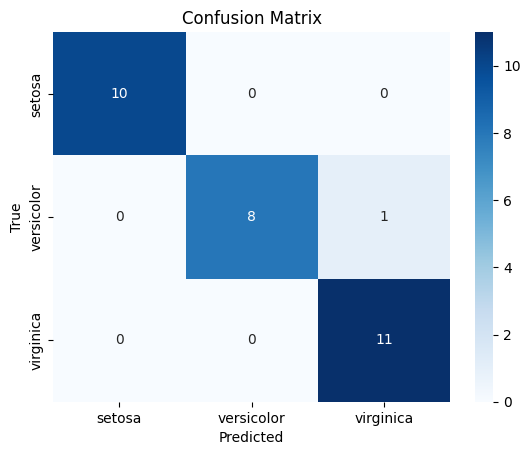

In [220]:
# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()